In [2]:
# %load_ext jupyternotify
import numpy as np
import pandas as pd
import matplotlib
import math
from sklearn import model_selection, ensemble, metrics, linear_model, preprocessing, pipeline
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('dataset/undp_train.csv', na_values='nan')
test = pd.read_csv('dataset/undp_test.csv', na_values='nan')

In [41]:
idx = pd.IndexSlice

In [44]:
data_ind = data.set_index(['year', 'country'])
test_ind = test.set_index(['year', 'country'])

In [18]:
list(enumerate(data_ind.columns))

[(0, 'Life expectancy Index'),
 (1, 'Life expectancy at birth'),
 (2, 'Gross national income (GNI) per capita (2011 PPP$)'),
 (3, 'Income Index'),
 (4, 'Expected years of schooling (years)'),
 (5, 'Mean years of schooling (years)'),
 (6, 'Human Development Index (HDI)'),
 (7, 'Education Index'),
 (8, 'Population using at least basic drinking-water services (%)'),
 (9, 'Population using at least basic sanitation services (%)'),
 (10, 'Gross capital formation (% of GDP)'),
 (11, 'Population, total (millions)'),
 (12, 'Population, urban (%)'),
 (13, 'Mortality rate, under-five (per 1,000 live births)'),
 (14, 'Mortality rate, infant (per 1,000 live births)'),
 (15,
  'Old age dependency ratio (old age (65 and older) per 100 people (ages 15-64))'),
 (16, 'Population ages 15–64 (millions)'),
 (17, 'Population, ages 65 and older (millions)'),
 (18, 'Life expectancy at birth, male (years)'),
 (19, 'Life expectancy at birth, female (years)'),
 (20, 'Population, under age 5 (millions)'),
 (21, 

In [143]:
data_ind.groupby(level=0)['y'].count()

year
1990    181
1991    180
1992    180
1993    180
1994    180
1995    180
1996    180
1997    180
1998    180
1999    180
2000    180
2001    180
2002    180
2003    180
2004    180
2005    180
2006    180
2007     90
2008     90
2009     90
2010     90
2011     90
2012     90
2013     89
2014     88
2015     87
Name: y, dtype: int64

In [192]:
index_columns = ['Life expectancy Index',
                 'Income Index',
                 'Human Development Index (HDI)',
                 'Education Index',
                 'Gender Development Index (GDI)',
                 'Gender Inequality Index (GII)', ]

In [75]:
full_ind = data_ind.append(test_ind)

In [201]:
data_ind[data_ind['y'] > 0.3][index_columns+['y']]

,,Life expectancy Index,Income Index,Human Development Index (HDI),Education Index,Gender Development Index (GDI),Gender Inequality Index (GII),y
year,country,,,,,,,
1990,Iceland,0.894,0.858,0.804,0.678,NaN,NaN,0.314729
1991,Iceland,0.896,0.857,0.817,0.710,NaN,NaN,0.321626
1992,Iceland,0.898,0.851,0.820,0.722,NaN,NaN,0.322799
1993,Iceland,0.900,0.851,0.821,0.721,NaN,NaN,0.322873
1994,Iceland,0.902,0.854,0.826,0.731,NaN,NaN,0.324807
1995,Iceland,0.904,0.854,0.829,0.738,0.981,0.184,0.326199
1996,Iceland,0.906,0.861,0.834,0.742,NaN,NaN,0.338173
1997,Iceland,0.909,0.864,0.841,0.758,NaN,NaN,0.341828
1998,Iceland,0.913,0.873,0.851,0.774,NaN,NaN,0.345862


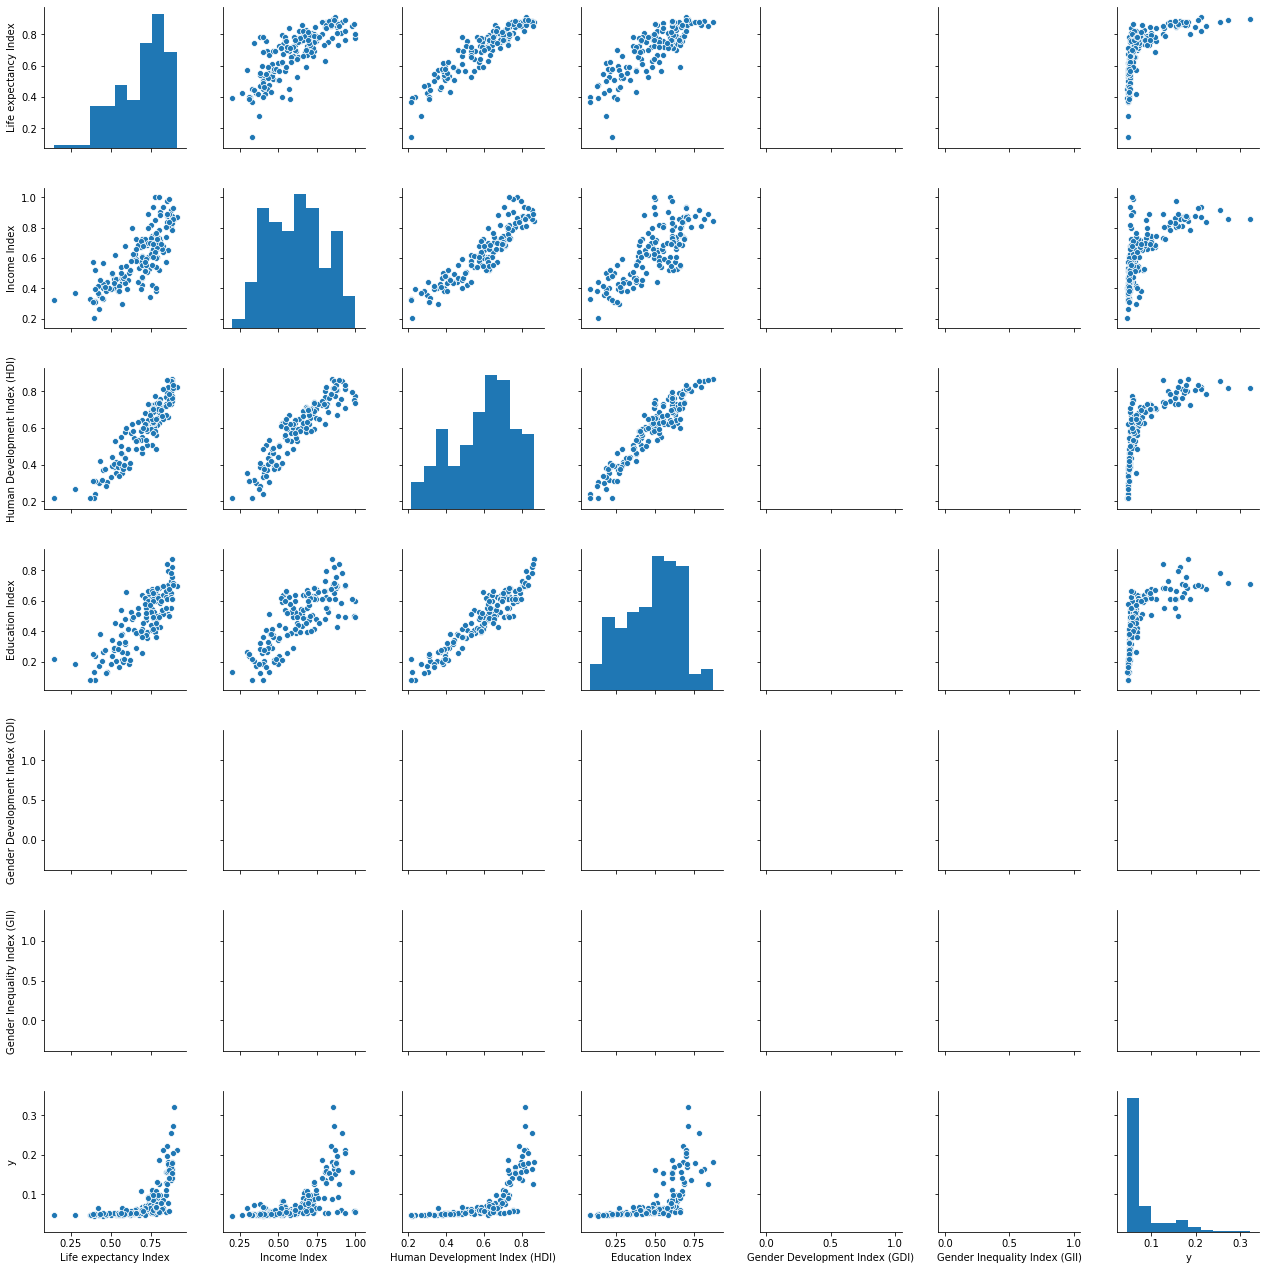

In [196]:
sns.pairplot(data_ind.loc[idx[1991, ], index_columns + ['y']])

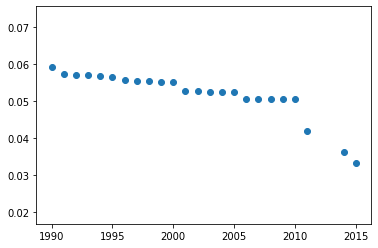

In [189]:
country = 'World'
y = data_ind.loc[idx[:, country], 'y']
x = [x[0] for x in data_ind.loc[idx[:, country], 'y'].index]
plt.scatter(x, y)

Text(0.5, 1.0, 'Life expectancy Index')

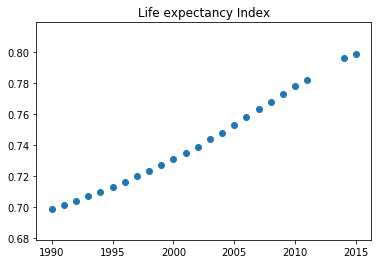

In [190]:
i = 0
y = data_ind.loc[idx[:, country], index_columns[i]]
x = [x[0] for x in data_ind.loc[idx[:, country], index_columns[i]].index]
plt.scatter(x, y)
plt.title(index_columns[i])

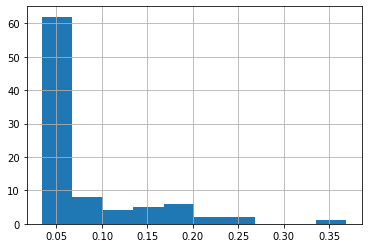

In [184]:
data_ind.loc[idx[2009,:],'y'].hist()

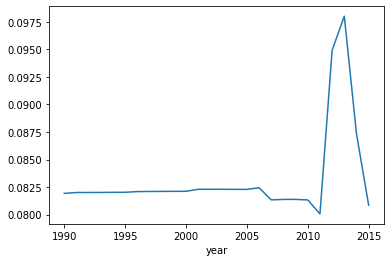

In [40]:
data_ind.groupby(level=0)['y'].mean().plot()

Text(0.5, 1.0, 'Education Index')

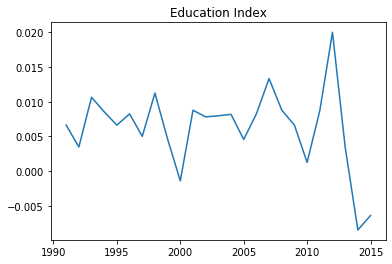

In [72]:
i = 5
a = data_ind.groupby(level=0)[index_columns[i]].mean()
y = [n - p for p,n in zip(a, a[1:])]
plt.plot(a.index[1:], y)
plt.title(index_columns[i])

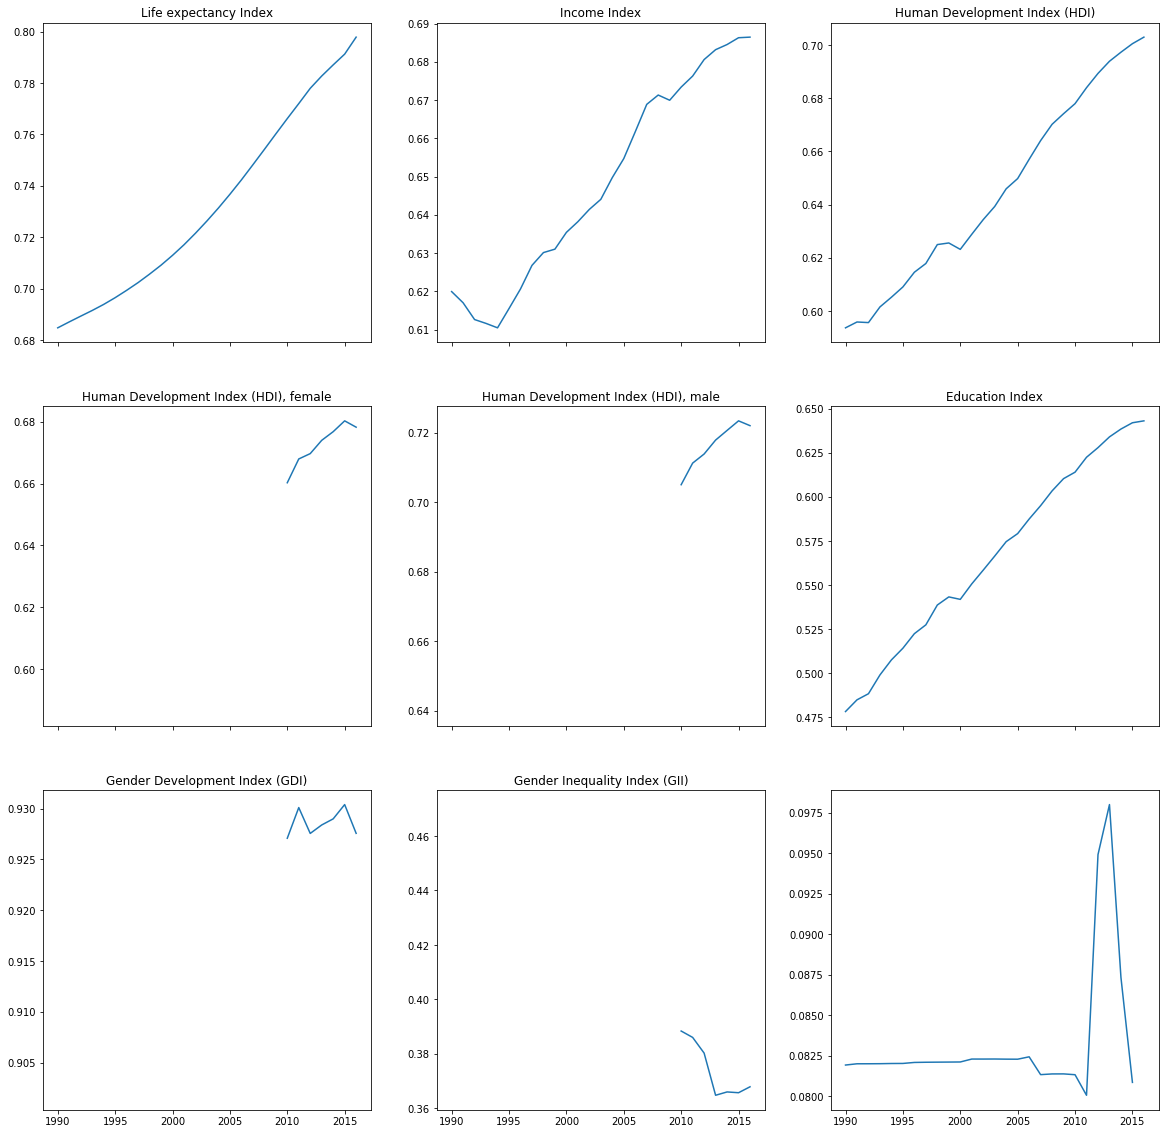

In [76]:
fig, ax = plt.subplots(3,3, figsize=(20,20), sharex=True)
for i in range(len(index_columns)):
    ax[i // 3, i % 3].plot(full_ind.groupby(level=0)[index_columns[i]].mean())
    ax[i // 3, i % 3].set_title(index_columns[i])
ax[2, 2].plot(data_ind.groupby(level=0)['y'].mean())

ValueError: Supply a 'c' argument or a 'color' kwarg but not both; they differ but their functionalities overlap.

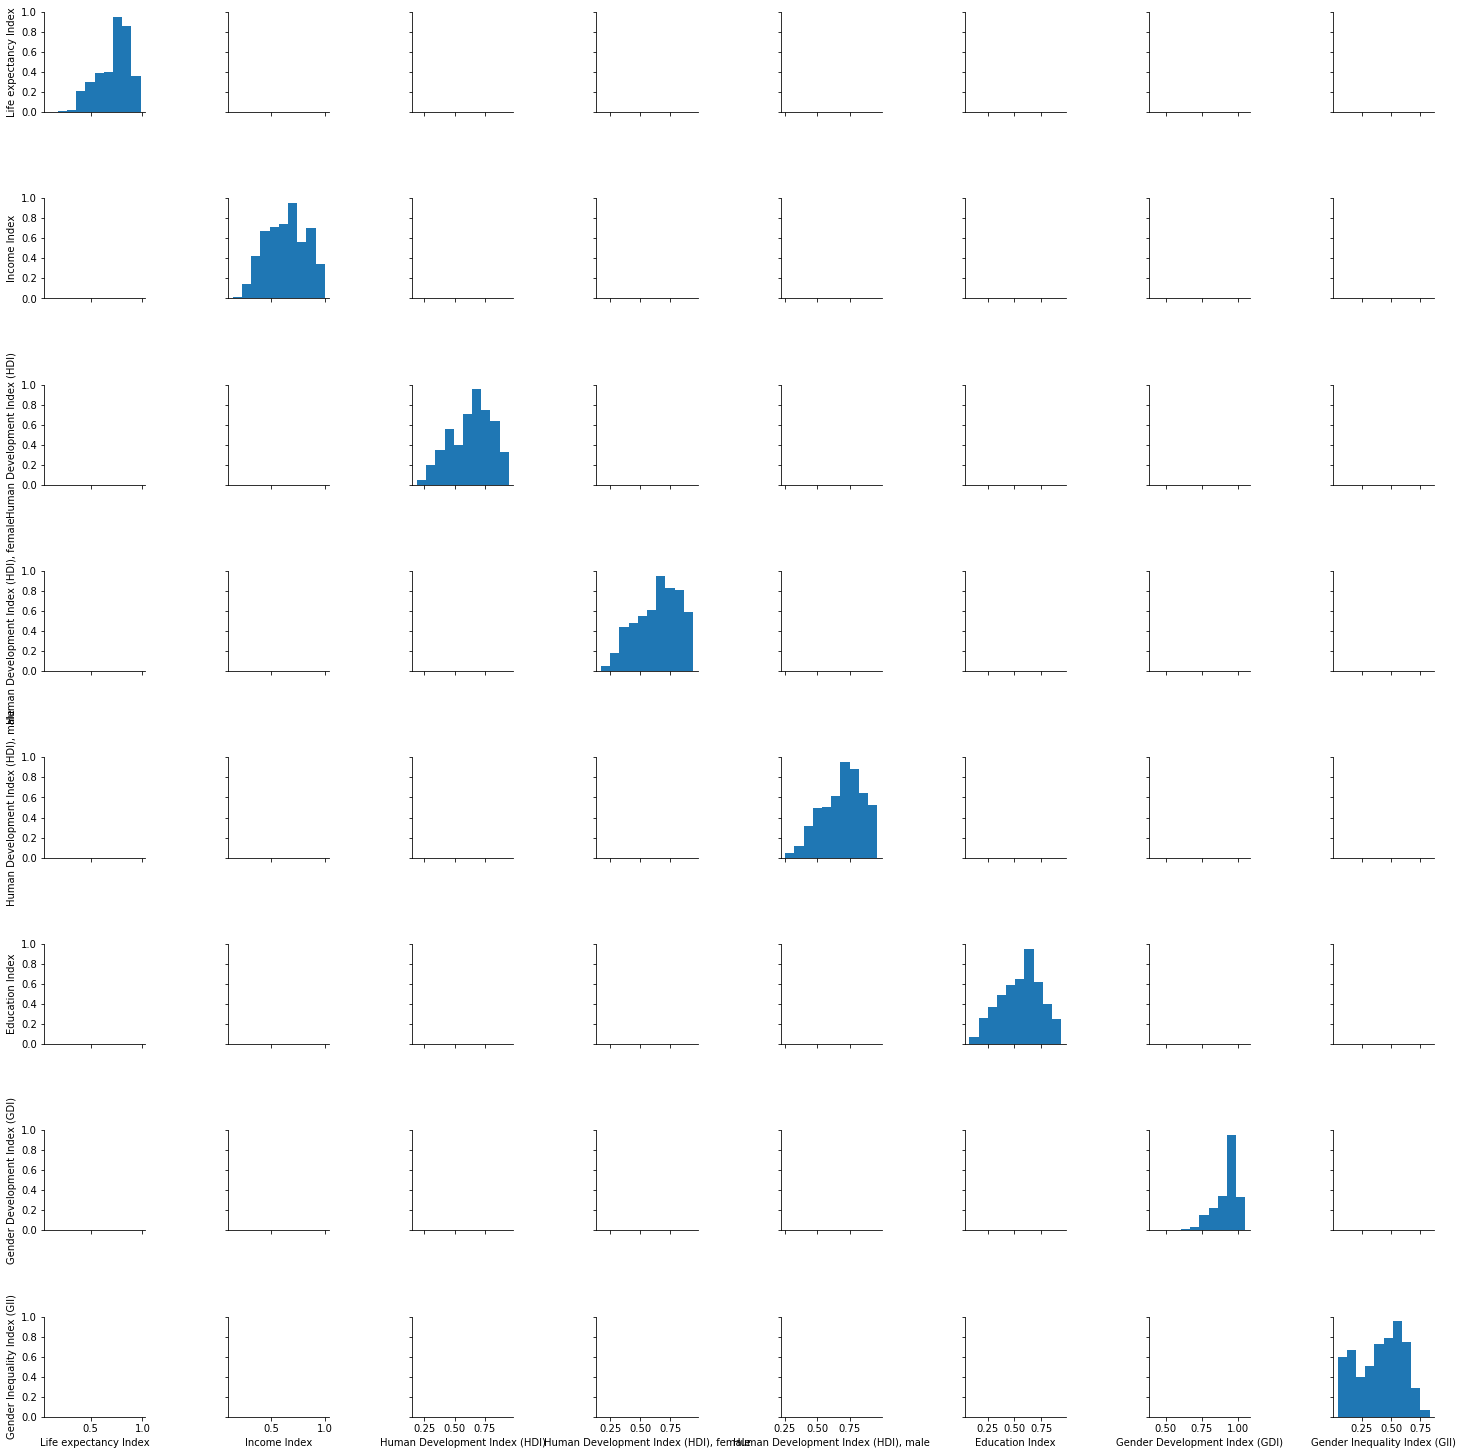

In [139]:
cmap = sns.cubehelix_palette(as_cmap=True, reverse=False)
sns.pairplot(data_ind[index_columns], plot_kws={'c': data_ind['y']})

In [130]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, random_state = 0)
data_2d_pca = pca.fit_transform(data_ind.fillna(value=0).loc[:, index_columns])

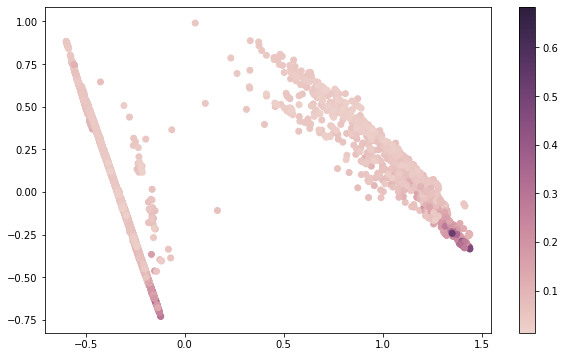

In [131]:
cmap = sns.cubehelix_palette(as_cmap=True, reverse=False)
plt.figure(figsize = (10, 10))
points = plt.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c = data_ind['y'], cmap=cmap)
plt.colorbar(points)


In [132]:
from sklearn import manifold
mds = manifold.MDS(n_components = 2, n_init = 1, max_iter = 100)
data_2d_mds = mds.fit_transform(data_ind.fillna(value=0).loc[:, index_columns])

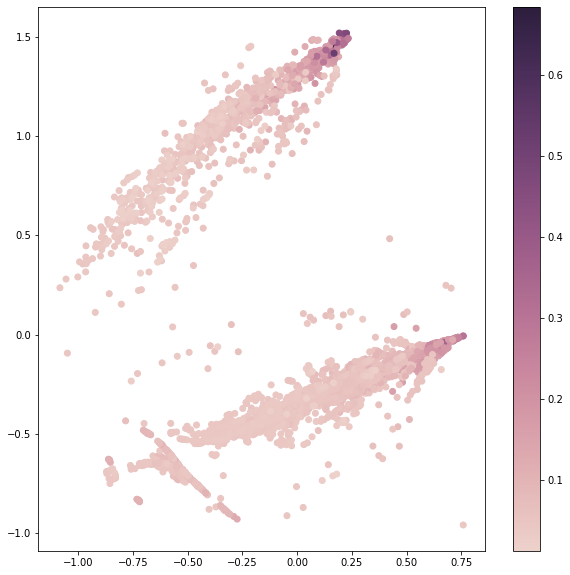

In [133]:
cmap = sns.cubehelix_palette(as_cmap=True, reverse=False)
plt.figure(figsize = (10, 10))
points = plt.scatter(data_2d_mds[:, 0], data_2d_mds[:, 1], c = data_ind['y'], cmap=cmap)
plt.colorbar(points)

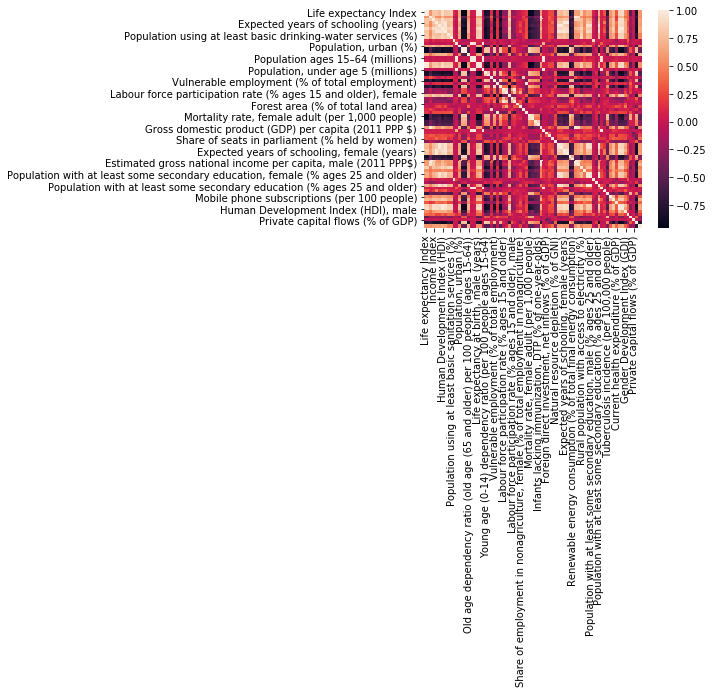

In [80]:
sns.heatmap(full_ind.corr(), square=True)

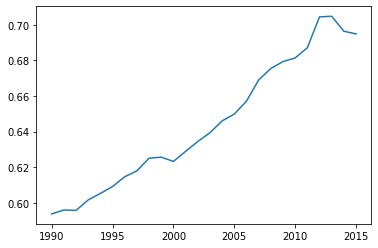

In [22]:
y = data_ind.groupby(level=0)['Human Development Index (HDI)'].mean()
plt.plot(y)